In this assignment, we will develop a ML model for cybersecurity intrusion detection. Please visit the website: https://www.unb.ca/cic/datasets/ids-2017.html and look around to see the problem space and the evaluation datasets to be used for ML model development.

This dataset is collected by cyber experts during experimentation that was carried on for 5 days long. The description of the experiments also inform the experimental ground truth.

# Question 1: Download the labeled dataset

Datasets downloaded to desktop

# Question 2: Pick one of the data files, call it Dataset 1 and examine its features

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Dataset1 = pd.read_csv(r'/Users/katieross/desktop/Tuesday-WorkingHours.pcap_ISCX.csv')

In [123]:
# Visually examine the first 50 rows of all columns
pd.set_option("display.max_columns", None)
Dataset1.head(50)

,Flow ID,Source IP,Destination IP,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Source Port_21,Source Port_22,Source Port_80,Source Port_123,Source Port_137,Source Port_443,Source Port_other_ports,Destination Port_21,Destination Port_22,Destination Port_53,Destination Port_80,Destination Port_88,Destination Port_123,Destination Port_137,Destination Port_139,Destination Port_389,Destination Port_443,Destination Port_445,Destination Port_465,Destination Port_3268,Destination Port_other_ports
0,192.168.10.3-192.168.10.5-88-49182-6,192.168.10.5,192.168.10.3,6,4/7/2017 8:54,640,7,4,440,358.0,220,0,62.857143,107.349008,179,0,89.500000,103.345698,1.246875e+06,1.718750e+04,6.400000e+01,1.355573e+02,445.0,1.0,640.0,1.066667e+02,1.943252e+02,497.0,1.0,538.0,1.793333e+02,3.036862e+02,530.0,4.0,0,0,0,0,164,104,1.093750e+04,6250.000000,0,220,66.500000,99.001837,9801.363636,0,0,0,1,0,0,0,0,0,72.545455,62.857143,89.500000,164,0,0,0,0,0,0,7,440,4,358,8192,2053,2,20,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,192.168.10.3-192.168.10.5-88-49183-6,192.168.10.5,192.168.10.3,6,4/7/2017 8:54,900,9,4,600,2944.0,300,0,66.666667,132.287566,1472,0,736.000000,849.859596,3.937778e+06,1.444444e+04,7.500000e+01,1.927952e+02,684.0,1.0,900.0,1.125000e+02,2.524112e+02,734.0,1.0,766.0,2.553333e+02,4.353233e+02,758.0,3.0,0,0,0,0,204,104,1.000000e+04,4444.444444,0,1472,253.142857,527.434262,278186.901100,0,0,0,1,0,0,0,0,0,272.615385,66.666667,736.000000,204,0,0,0,0,0,0,9,600,4,2944,8192,2053,2,20,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,192.168.10.3-192.168.10.5-88-49184-6,192.168.10.5,192.168.10.3,6,4/7/2017 8:54,1205,7,4,2776,2830.0,1388,0,396.571429,677.274651,1415,0,707.500000,816.950631,4.652282e+06,9.128631e+03,1.205000e+02,2.364333e+02,777.0,1.0,1205.0,2.008333e+02,3.970584e+02,1008.0,1.0,927.0,3.090000e+02,4.916472e+02,876.0,1.0,0,0,0,0,164,104,5.809129e+03,3319.502075,0,1415,467.166667,690.098917,476236.515200,0,0,0,1,0,0,0,0,0,509.636364,396.571429,707.500000,164,0,0,0,0,0,0,7,2776,4,2830,8192,2053,2,20,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,192.168.10.3-192.168.10.5-88-49185-6,192.168.10.5,192.168.10.3,6,4/7/2017 8:54,511,7,4,452,370.0,226,0,64.571429,110.276708,185,0,92.500000,106.809800,1.608611e+06,2.152642e+04,5.110000e+01,9.076765e+01,299.0,1.0,511.0,8.516667e+01,1.319006e+02,349.0,1.0,462.0,1.540000e+02,2.247198e+02,412.0,1.0,0,0,0,0,164,104,1.369863e+04,7827.788650,0,226,68.500000,101.933579,10390.454550,0,0,0,1,0,0,0,0,0,74.727273,64.571429,92.500000,164,0,0,0,0,0,0,7,452,4,370,8192,2053,2,20,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0

In [4]:
# Examine feature names
Dataset1.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [5]:
# Make sure there is more than one label
Dataset1[' Label'].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator'], dtype=object)

In [6]:
# Drop null value from Flow Bytes/s
Dataset1.dropna(inplace=True)

# Question 3: For the Dataset 1, pick a machine learning methodology and justify your choice

For Dataset1, I would use supervised learning.  Labels are available to train a model to predict which class a given instance belongs to.  Data about network traffic will be input into an algorithm and an output will predict whether each example is benign background traffic or malicious.  In this case, we want to map an input to an ouput, which makes it a good candidate for supervised learning.

# Question 4: Process the class feature/category as binary classes for supervised learning assign BENIGN to value 0 and the rest to value 1. Check its balance for Dataset1.

In [7]:
# Reassign labels to binary classes
Dataset1[' Label'].replace("BENIGN", 0, inplace=True)
Dataset1[' Label'].replace('FTP-Patator', 1, inplace=True)
Dataset1[' Label'].replace('SSH-Patator', 1, inplace=True)

In [8]:
# Check labeling
Dataset1[' Label'].unique()

array([0, 1])

In [9]:
# Check balance
Dataset1[' Label'].value_counts()

0    431873
1     13835
Name:  Label, dtype: int64

This dataset is unbalanced.  96.9% of instances are benign, while only 3.1% are malicious.

# Question 5: Explore Dataset 1 features with respect to the class.

In [10]:
# Research Source Port feature
counts = Dataset1[' Source Port'].value_counts()
print(len(counts.unique()))    # How many port numbers are there?
print(counts.unique())       # List port numbers

75
[58581 16774  5145  2117  1905  1040   318   316   187   149   136   134
   119    98    93    87    82    68    64    63    55    54    53    52
    51    50    49    48    47    46    45    44    43    42    41    40
    39    38    37    36    35    34    33    32    31    30    29    28
    27    26    25    24    23    22    21    20    19    18    17    16
    15    14    13    12    11    10     9     8     7     6     5     4
     3     2     1]


In [11]:
one_percent = len(counts)*0.01 # How many port numbers are in the bottom 1% of occurances?
print(one_percent)

525.54


In [12]:
small = counts[counts<=int(one_percent)]     # Combine these port numbers into "other_ports" category

In [13]:
# combine source port numbers with <1% of total
Dataset1[' Source Port'].replace(small.index, 'other_ports', inplace=True)

In [14]:
Dataset1[' Source Port'].unique()

array(['other_ports', 443, 123, 137, 21, 80, 22], dtype=object)

In [15]:
# Research Destination Port feature
counts = Dataset1[' Destination Port'].value_counts()
print(len(counts))    # How many port numbers are there?
print(counts.unique())       # List port numbers

31847
[190939  97215  45650   8995   8029   5145   1911   1333   1232    710
    607    564    372    318    316    178    172    148    102     69
     41     40     30     25     24     17     16     14     13     12
     11     10      9      8      7      6      5      4      3      2
      1]


In [16]:
one_percent = len(counts)*0.01 # How many port numbers are in the bottom 1% of occurances?
print(one_percent)

318.47


In [17]:
small = counts[counts<=int(one_percent)]     # Combine these port numbers into "other_ports" category

In [18]:
# combine source port numbers with <1% of total
Dataset1[' Destination Port'].replace(small.index, 'other_ports', inplace=True)

In [19]:
Dataset1[' Destination Port'].unique()

array([88, 389, 'other_ports', 80, 443, 445, 123, 53, 3268, 137, 21, 22,
       465, 139], dtype=object)

In [20]:
Dataset1 = pd.get_dummies(Dataset1, columns=[' Source Port', ' Destination Port'])

In [21]:
Dataset1 = Dataset1.reset_index()
Dataset1 = Dataset1.drop(columns=['index'])

# Question 6: Display some histograms and anything you deem fit to pick independent Dataset 1 features.

Correlation and Information gain were used to select the independent features.

In [22]:
X = Dataset1.drop(columns=[' Label', 'Flow ID', ' Source IP', ' Destination IP', ' Timestamp', 'Flow Bytes/s', ' Flow Packets/s'])
y = Dataset1[' Label']

In [23]:
# Look for features with the most information gain
importances = mutual_info_classif(X, y)

In [24]:
feat_importances = pd.Series(importances, X.columns[0:len(X.columns)])

In [25]:
# List features in order of most information gain
pd.options.display.max_rows = 999
feat_importances.sort_values(ascending=False)

 Packet Length Mean              0.104382
 Packet Length Std               0.103101
 Packet Length Variance          0.102779
 Average Packet Size             0.102453
 Fwd Packet Length Mean          0.102266
 Avg Fwd Segment Size            0.102151
 Max Packet Length               0.100777
 Init_Win_bytes_backward         0.097570
 Fwd Packet Length Std           0.094971
Init_Win_bytes_forward           0.092009
 Fwd Packet Length Max           0.090924
 Subflow Fwd Bytes               0.085870
Total Length of Fwd Packets      0.085671
 Protocol                        0.076690
 Bwd Packet Length Mean          0.075391
 Avg Bwd Segment Size            0.075332
 Source Port_other_ports         0.073909
Bwd Packet Length Max            0.071657
 Bwd Packets/s                   0.067175
 Subflow Bwd Bytes               0.066117
 Total Length of Bwd Packets     0.066003
 Fwd IAT Max                     0.065121
 Flow Duration                   0.065013
 Flow IAT Max                    0

Features with higher information gain have a higher statistical dependence between the feature and the dependent variable.  These features will have a more significant impact on predicting the class.

<BarContainer object of 97 artists>

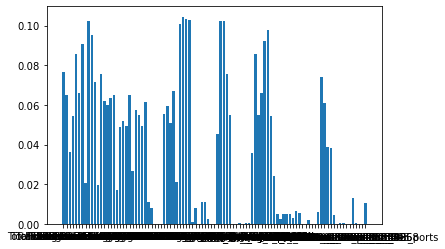

In [26]:
# Plot information gain
plt.bar(feat_importances.index, feat_importances)

In [27]:
# Features with information gain greater than 0.07
important = feat_importances[feat_importances>0.07]

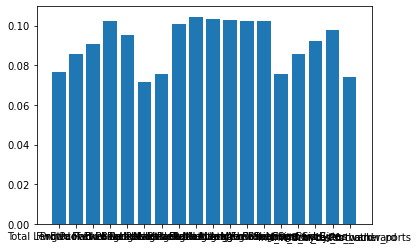

In [28]:
# Plot of features with information gain greater than 0.07
plt.bar(important.index, important)
plt.show()

In [29]:
# Find correlation between variables
corr = Dataset1.corr()

In [30]:
# List correlations between the dependent variable and independent variables in descending order
corr_label = corr[' Label']
corr_label.sort_values(ascending=False)

 Label                           1.000000
 Destination Port_21             0.704511
 Destination Port_22             0.549353
 SYN Flag Count                  0.169003
Fwd PSH Flags                    0.169003
 PSH Flag Count                  0.108487
 Source Port_other_ports         0.087239
 act_data_pkt_fwd                0.086219
Init_Win_bytes_forward           0.084698
 ACK Flag Count                  0.081119
 URG Flag Count                  0.053066
Fwd Packets/s                    0.012073
 Flow Packets/s                  0.010729
 Down/Up Ratio                   0.008826
 min_seg_size_forward            0.000890
 Bwd Header Length               0.000602
 Fwd Header Length               0.000509
 Fwd Header Length.1             0.000509
 Subflow Bwd Packets            -0.000364
 Total Backward Packets         -0.000364
 Total Fwd Packets              -0.000807
Subflow Fwd Packets             -0.000807
 Total Length of Bwd Packets    -0.001447
 Subflow Bwd Bytes              -0

<BarContainer object of 100 artists>

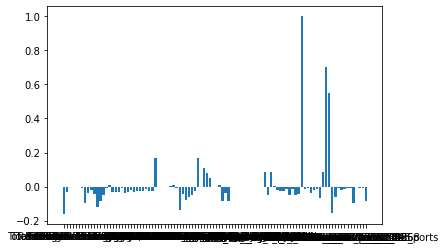

In [31]:
plt.bar(corr_label.index, corr_label)

The features that have the most impact on the dependent variable are those with the highest and lowest numbers.  The larger negative numbers have a negative correlation with the label, but it is a high negative correlation and would be useful for predicting the label.

The features with a correlation of 0.05 or higher and -0.05 and lower will be picked as the independent Dataset 1 features.

In [32]:
# Choose the features that are most highly correlated with the dependent variable
positive = corr_label[corr_label > 0.05]
negative = corr_label[corr_label < -0.05]
temp = [positive,negative]
final = pd.concat(temp)
features = list(final.index)

In [33]:
# Final list of features
features

['Fwd PSH Flags',
 ' SYN Flag Count',
 ' PSH Flag Count',
 ' ACK Flag Count',
 ' URG Flag Count',
 'Init_Win_bytes_forward',
 ' act_data_pkt_fwd',
 ' Label',
 ' Source Port_other_ports',
 ' Destination Port_21',
 ' Destination Port_22',
 ' Protocol',
 ' Fwd Packet Length Min',
 ' Bwd Packet Length Min',
 ' Bwd Packet Length Mean',
 ' Min Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' Average Packet Size',
 ' Avg Bwd Segment Size',
 ' Source Port_443',
 ' Destination Port_53',
 ' Destination Port_80',
 ' Destination Port_443',
 ' Destination Port_other_ports']

In [34]:
# Create a subset of Dataset1 with chosen features
Final_dataset1 = Dataset1[features]

In [35]:
Final_dataset1

,Fwd PSH Flags,SYN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Init_Win_bytes_forward,act_data_pkt_fwd,Label,Source Port_other_ports,Destination Port_21,...,Packet Length Mean,Packet Length Std,Packet Length Variance,Average Packet Size,Avg Bwd Segment Size,Source Port_443,Destination Port_53,Destination Port_80,Destination Port_443,Destination Port_other_ports
0,0,0,1,0,0,8192,2,0,1,0,...,66.500000,99.001837,9801.363636,72.545455,89.5,0,0,0,0,0
1,0,0,1,0,0,8192,2,0,1,0,...,253.142857,527.434262,278186.901100,272.615385,736.0,0,0,0,0,0
2,0,0,1,0,0,8192,2,0,1,0,...,467.166667,690.098917,476236.515200,509.636364,707.5,0,0,0,0,0
3,0,0,1,0,0,8192,2,0,1,0,...,68.500000,101.933579,10390.454550,74.727273,92.5,0,0,0,0,0
4,0,0,1,0,0,8192,2,0,1,0,...,254.000000,527.520762,278278.153800,273.538461,736.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445703,0,0,0,0,0,-1,1,0,1,0,...,50.400000,8.763561,76.800000,63.000000,60.0,0,1,0,0,0
445704,0,0,0,1,1,64,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,1,0,0,0,1
445705,0,0,0,0,0,-1,1,0,1,0,...,64.000000,27.386128,750.000000,80.000000,94.0,0,1,0,0,0
445706,0,0,0,1,0,122,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,1,0,0,0,1


# Question 7: Attempt a few classifier models and report their 10-fold CV performance.

In [36]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

In [37]:
# Assign X to independent variables and y to dependent variable
X = Final_dataset1.drop(columns=[' Label'])
y = Final_dataset1[' Label']

In [38]:
# Scale the independent features
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled)

In [39]:
# Create Random Forest Classifier
RFC = RandomForestClassifier()

# Create StratifiedKFold object
skf = StratifiedKFold(n_splits=10, shuffle=True)
lst_accu_stratified = []

# Fit model using Stratified Cross Validation
for train_index, test_index in skf.split(X, y):
    x_train_fold =  X.iloc[train_index]
    x_test_fold = X.iloc[test_index]
    y_train_fold = y[train_index]
    y_test_fold = y[test_index]
    RFC.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(RFC.score(x_test_fold, y_test_fold))
    
print("Average accuracy: " + str(np.array(lst_accu_stratified).mean()))

Average accuracy: 0.9999439094653854


In [40]:
# Create SVM
svm = SVC()

# Create StratifiedKFold object
skf = StratifiedKFold(n_splits=10, shuffle=True)
lst_accu_stratified = []
  
# Fit model using Stratified Cross Validation
for train_index, test_index in skf.split(X, y):
    x_train_fold =  X.iloc[train_index]
    x_test_fold = X.iloc[test_index]
    y_train_fold = y[train_index]
    y_test_fold = y[test_index]
    svm.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(svm.score(x_test_fold, y_test_fold))
    
print("Average accuracy: " + str(np.array(lst_accu_stratified).mean()))

Average accuracy: 0.9978102252870178


In [41]:
# Create Logistic Regression Classifier
logreg = LogisticRegression()

# Create StratifiedKFold object
skf = StratifiedKFold(n_splits=10, shuffle=True)
lst_accu_stratified = []

# Fit model using Stratified Cross Validation
for train_index, test_index in skf.split(X, y):
    x_train_fold =  X.iloc[train_index]
    x_test_fold = X.iloc[test_index]
    y_train_fold = y[train_index]
    y_test_fold = y[test_index]
    logreg.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(logreg.score(x_test_fold, y_test_fold))
    
print("Average accuracy: " + str(np.array(lst_accu_stratified).mean()))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Average accuracy: 0.9975387474619242


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Question 8: Convert your code to be used for the remaining 7 datasets, i.e. Datasets 2-8.

In [42]:
Dataset2 = pd.read_csv(r'/Users/katieross/desktop/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
Dataset3 = pd.read_csv(r'/Users/katieross/desktop/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
Dataset4 = pd.read_csv(r'/Users/katieross/desktop/Friday-WorkingHours-Morning.pcap_ISCX.csv')
Dataset5 = pd.read_csv(r'/Users/katieross/desktop/Monday-WorkingHours.pcap_ISCX.csv')      # Only has one class
Dataset6 = pd.read_csv(r'/Users/katieross/desktop/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
Dataset7 = pd.read_csv(r'/Users/katieross/desktop/fix.csv')
Dataset8 = pd.read_csv(r'/Users/katieross/desktop/Wednesday-workingHours.pcap_ISCX.csv')

In [43]:
# Make sure there is more than one label
Dataset2[' Label'].unique()
Dataset3[' Label'].unique()
Dataset4[' Label'].unique()
Dataset5[' Label'].unique()
Dataset6[' Label'].unique()
Dataset7[' Label'].unique()
Dataset8[' Label'].unique()

array(['BENIGN', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk',
       'DoS GoldenEye', 'Heartbleed'], dtype=object)

In [44]:
# Use info() to check for null values and data types
Dataset8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       692703 non-null  object 
 1    Source IP                    692703 non-null  object 
 2    Source Port                  692703 non-null  int64  
 3    Destination IP               692703 non-null  object 
 4    Destination Port             692703 non-null  int64  
 5    Protocol                     692703 non-null  int64  
 6    Timestamp                    692703 non-null  object 
 7    Flow Duration                692703 non-null  int64  
 8    Total Fwd Packets            692703 non-null  int64  
 9    Total Backward Packets       692703 non-null  int64  
 10  Total Length of Fwd Packets   692703 non-null  int64  
 11   Total Length of Bwd Packets  692703 non-null  float64
 12   Fwd Packet Length Max        692703 non-nul

In [45]:
# Drop null value from Flow Bytes/s
Dataset2.dropna(inplace=True)
Dataset3.dropna(inplace=True)
Dataset4.dropna(inplace=True)
Dataset5.dropna(inplace=True)
Dataset6.dropna(inplace=True)
Dataset7.dropna(inplace=True)
Dataset8.dropna(inplace=True)

In [46]:
Dataset8[' Label'].unique()

array(['BENIGN', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk',
       'DoS GoldenEye', 'Heartbleed'], dtype=object)

In [47]:
# Reassign labels to binary classes
Dataset2[' Label'].replace("BENIGN", 0, inplace=True)
Dataset2[' Label'].replace('DDoS', 1, inplace=True)

In [48]:
# Reassign labels to binary classes
Dataset3[' Label'].replace("BENIGN", 0, inplace=True)
Dataset3[' Label'].replace('PortScan', 1, inplace=True)

In [49]:
# Reassign labels to binary classes
Dataset4[' Label'].replace("BENIGN", 0, inplace=True)
Dataset4[' Label'].replace('Bot', 1, inplace=True)

In [50]:
# Reassign labels to binary classes
Dataset6[' Label'].replace("BENIGN", 0, inplace=True)
Dataset6[' Label'].replace('Infiltration', 1, inplace=True)

In [51]:
# Reassign labels to binary classes
Dataset8[' Label'].replace("BENIGN", 0, inplace=True)
Dataset8[' Label'].replace('Heartbleed', 1, inplace=True)
Dataset8[' Label'].replace('DoS slowloris', 1, inplace=True)
Dataset8[' Label'].replace('DoS Slowhttptest', 1, inplace=True)
Dataset8[' Label'].replace('DoS Hulk', 1, inplace=True)
Dataset8[' Label'].replace('DoS GoldenEye', 1, inplace=True)

In [52]:
# Check balance
print(Dataset2[' Label'].value_counts())
print(Dataset3[' Label'].value_counts())
print(Dataset4[' Label'].value_counts())
print(Dataset5[' Label'].value_counts())
print(Dataset6[' Label'].value_counts())
print(Dataset7[' Label'].value_counts())
print(Dataset8[' Label'].value_counts())

# Dataset 3 is mostly balanced, all others are unbalanced

1    128027
0     97714
Name:  Label, dtype: int64
1    158930
0    127522
Name:  Label, dtype: int64
0    189039
1      1966
Name:  Label, dtype: int64
BENIGN    529854
Name:  Label, dtype: int64
0    288548
1        36
Name:  Label, dtype: int64
BENIGN                        168166
Web Attack ñ Brute Force        1507
Web Attack ñ XSS                 652
Web Attack ñ Sql Injection        21
Name:  Label, dtype: int64
0    439972
1    251723
Name:  Label, dtype: int64


In [53]:
# Research Source Port feature

counts = Dataset2[' Source Port'].value_counts()
print(len(counts.unique()))    # How many port numbers are there?
print(counts.unique())       # List port numbers
one_percent = len(counts)*0.01 # How many port numbers are in the bottom 1% of occurances?
print(one_percent)
small = counts[counts<=int(one_percent)]     # Combine these port numbers into "other_ports" category
# combine source port numbers with <1% of total
Dataset2[' Source Port'].replace(small.index, 'other_ports', inplace=True)

counts = Dataset3[' Source Port'].value_counts()
print(len(counts.unique()))    # How many port numbers are there?
print(counts.unique())       # List port numbers
one_percent = len(counts)*0.01 # How many port numbers are in the bottom 1% of occurances?
print(one_percent)
small = counts[counts<=int(one_percent)]     # Combine these port numbers into "other_ports" category
# combine source port numbers with <1% of total
Dataset3[' Source Port'].replace(small.index, 'other_ports', inplace=True)

counts = Dataset4[' Source Port'].value_counts()
print(len(counts.unique()))    # How many port numbers are there?
print(counts.unique())       # List port numbers
one_percent = len(counts)*0.01 # How many port numbers are in the bottom 1% of occurances?
print(one_percent)
small = counts[counts<=int(one_percent)]     # Combine these port numbers into "other_ports" category
# combine source port numbers with <1% of total
Dataset4[' Source Port'].replace(small.index, 'other_ports', inplace=True)

counts = Dataset5[' Source Port'].value_counts()
print(len(counts.unique()))    # How many port numbers are there?
print(counts.unique())       # List port numbers
one_percent = len(counts)*0.01 # How many port numbers are in the bottom 1% of occurances?
print(one_percent)
small = counts[counts<=int(one_percent)]     # Combine these port numbers into "other_ports" category
# combine source port numbers with <1% of total
Dataset5[' Source Port'].replace(small.index, 'other_ports', inplace=True)

counts = Dataset6[' Source Port'].value_counts()
print(len(counts.unique()))    # How many port numbers are there?
print(counts.unique())       # List port numbers
one_percent = len(counts)*0.01 # How many port numbers are in the bottom 1% of occurances?
print(one_percent)
small = counts[counts<=int(one_percent)]     # Combine these port numbers into "other_ports" category
# combine source port numbers with <1% of total
Dataset6[' Source Port'].replace(small.index, 'other_ports', inplace=True)

#counts = Dataset7[' Source Port'].value_counts()
print(len(counts.unique()))    # How many port numbers are there?
print(counts.unique())       # List port numbers
one_percent = len(counts)*0.01 # How many port numbers are in the bottom 1% of occurances?
print(one_percent)
small = counts[counts<=int(one_percent)]     # Combine these port numbers into "other_ports" category
# combine source port numbers with <1% of total
Dataset7[' Source Port'].replace(small.index, 'other_ports', inplace=True)

counts = Dataset8[' Source Port'].value_counts()
print(len(counts.unique()))    # How many port numbers are there?
print(counts.unique())       # List port numbers
one_percent = len(counts)*0.01 # How many port numbers are in the bottom 1% of occurances?
print(one_percent)
small = counts[counts<=int(one_percent)]     # Combine these port numbers into "other_ports" category
# combine source port numbers with <1% of total
Dataset8[' Source Port'].replace(small.index, 'other_ports', inplace=True)

31
[33527  6419   362   274   156    86    54    53    31    26    22    20
    19    18    17    16    15    14    13    12    11    10     9     8
     7     6     5     4     3     2     1]
506.97
64
[13754  5201  1009  1004  1003  1002  1001  1000   999   998   997   996
   995   994   993   992   991   990   989   988   987   986   977   621
   443   337   266   101    89    87    42    38    36    35    30    29
    28    27    26    25    24    23    22    21    20    19    18    17
    16    15    14    13    12    11    10     9     8     7     6     5
     4     3     2     1]
369.62
44
[20602  7378  3578   750   705   465   219   167   152    82    80    72
    61    50    48    41    32    28    26    25    24    23    22    21
    20    19    18    17    16    15    14    13    12    11    10     9
     8     7     6     5     4     3     2     1]
402.73
74
[84865 18512  5180  1510  1023   531   317   315   162   156   107   105
    99    72    69    64    59    58    57  

In [54]:
# Research Destination Port feature

counts = Dataset2[' Destination Port'].value_counts()
print(len(counts.unique()))    # How many port numbers are there?
print(counts.unique())       # List port numbers
one_percent = len(counts)*0.01 # How many port numbers are in the bottom 1% of occurances?
print(one_percent)
small = counts[counts<=int(one_percent)]     # Combine these port numbers into "other_ports" category
# combine destination port numbers with <1% of total
Dataset2[' Destination Port'].replace(small.index, 'other_ports', inplace=True)

counts = Dataset3[' Destination Port'].value_counts()
print(len(counts.unique()))    # How many port numbers are there?
print(counts.unique())       # List port numbers
one_percent = len(counts)*0.01 # How many port numbers are in the bottom 1% of occurances?
print(one_percent)
small = counts[counts<=int(one_percent)]     # Combine these port numbers into "other_ports" category
# combine destination port numbers with <1% of total
Dataset3[' Destination Port'].replace(small.index, 'other_ports', inplace=True)

counts = Dataset4[' Destination Port'].value_counts()
print(len(counts.unique()))    # How many port numbers are there?
print(counts.unique())       # List port numbers
one_percent = len(counts)*0.01 # How many port numbers are in the bottom 1% of occurances?
print(one_percent)
small = counts[counts<=int(one_percent)]     # Combine these port numbers into "other_ports" category
# combine destination port numbers with <1% of total
Dataset4[' Destination Port'].replace(small.index, 'other_ports', inplace=True)

counts = Dataset5[' Destination Port'].value_counts()
print(len(counts.unique()))    # How many port numbers are there?
print(counts.unique())       # List port numbers
one_percent = len(counts)*0.01 # How many port numbers are in the bottom 1% of occurances?
print(one_percent)
small = counts[counts<=int(one_percent)]     # Combine these port numbers into "other_ports" category
# combine destination port numbers with <1% of total
Dataset5[' Destination Port'].replace(small.index, 'other_ports', inplace=True)

counts = Dataset6[' Destination Port'].value_counts()
print(len(counts.unique()))    # How many port numbers are there?
print(counts.unique())       # List port numbers
one_percent = len(counts)*0.01 # How many port numbers are in the bottom 1% of occurances?
print(one_percent)
small = counts[counts<=int(one_percent)]     # Combine these port numbers into "other_ports" category
# combine destination port numbers with <1% of total
Dataset6[' Destination Port'].replace(small.index, 'other_ports', inplace=True)

counts = Dataset7[' Destination Port'].value_counts()
print(len(counts.unique()))    # How many port numbers are there?
print(counts.unique())       # List port numbers
one_percent = len(counts)*0.01 # How many port numbers are in the bottom 1% of occurances?
print(one_percent)
small = counts[counts<=int(one_percent)]     # Combine these port numbers into "other_ports" category
# combine destination port numbers with <1% of total
Dataset7[' Destination Port'].replace(small.index, 'other_ports', inplace=True)

counts = Dataset8[' Destination Port'].value_counts()
print(len(counts.unique()))    # How many port numbers are there?
print(counts.unique())       # List port numbers
one_percent = len(counts)*0.01 # How many port numbers are in the bottom 1% of occurances?
print(one_percent)
small = counts[counts<=int(one_percent)]     # Combine these port numbers into "other_ports" category
# combine destination port numbers with <1% of total
Dataset8[' Destination Port'].replace(small.index, 'other_ports', inplace=True)

27
[136950  31950  13485    510    362    342    274    261    173    167
    147    100     91     54     53     48     23     16     12      8
      7      6      5      4      3      2      1]
239.49
45
[58744 26934 16741   915   778   668   622   543   443   368   357   353
   317   256   209   205   163   162   161   160   159   158   157   156
   155   101    87    42    38    35    31    27    21    16    11    10
     9     8     7     6     5     4     3     2     1]
144.93
38
[90277 39226 20612  3578  1261  1004   756   736   716   391   351   270
   185   167   152   130   109   107    81    55    33    31    30    20
    16    15    13    12    10     9     8     7     6     5     4     3
     2     1]
160.82
44
[214674 140931  50829   5180   2132   1522   1215   1207    958    728
    499    449    317    315    255    156    149    148    115     84
     67     59     52     49     41     36     26     21     18     15
     14     13     12     11     10      9      8    

In [55]:
# One hot encode Source and Destination ports
Dataset2 = pd.get_dummies(Dataset2, columns=[' Source Port', ' Destination Port'])
Dataset3 = pd.get_dummies(Dataset3, columns=[' Source Port', ' Destination Port'])
Dataset4 = pd.get_dummies(Dataset4, columns=[' Source Port', ' Destination Port'])
Dataset5 = pd.get_dummies(Dataset5, columns=[' Source Port', ' Destination Port'])
Dataset6 = pd.get_dummies(Dataset6, columns=[' Source Port', ' Destination Port'])
Dataset7 = pd.get_dummies(Dataset7, columns=[' Source Port', ' Destination Port'])
Dataset8 = pd.get_dummies(Dataset8, columns=[' Source Port', ' Destination Port'])

In [56]:
# Reindex from dropping rows
Dataset2 = Dataset2.reset_index()
Dataset2 = Dataset2.drop(columns=['index'])

Dataset3 = Dataset3.reset_index()
Dataset3 = Dataset3.drop(columns=['index'])

Dataset4 = Dataset4.reset_index()
Dataset4 = Dataset4.drop(columns=['index'])

Dataset5 = Dataset5.reset_index()
Dataset5 = Dataset5.drop(columns=['index'])

Dataset6 = Dataset6.reset_index()
Dataset6 = Dataset6.drop(columns=['index'])

Dataset7 = Dataset7.reset_index()
Dataset7 = Dataset7.drop(columns=['index'])

Dataset8 = Dataset8.reset_index()
Dataset8 = Dataset8.drop(columns=['index'])

In [57]:
X2 = Dataset2.drop(columns=[' Label', 'Flow ID', ' Source IP', ' Destination IP', ' Timestamp', 'Flow Bytes/s', ' Flow Packets/s'])
y2 = Dataset2[' Label']

X3 = Dataset3.drop(columns=[' Label', 'Flow ID', ' Source IP', ' Destination IP', ' Timestamp', 'Flow Bytes/s', ' Flow Packets/s'])
y3 = Dataset3[' Label']

X4 = Dataset4.drop(columns=[' Label', 'Flow ID', ' Source IP', ' Destination IP', ' Timestamp', 'Flow Bytes/s', ' Flow Packets/s'])
y4 = Dataset4[' Label']

X5 = Dataset5.drop(columns=[' Label', 'Flow ID', ' Source IP', ' Destination IP', ' Timestamp', 'Flow Bytes/s', ' Flow Packets/s'])
y5 = Dataset5[' Label']

X6 = Dataset6.drop(columns=[' Label', 'Flow ID', ' Source IP', ' Destination IP', ' Timestamp', 'Flow Bytes/s', ' Flow Packets/s'])
y6 = Dataset6[' Label']

X7 = Dataset7.drop(columns=[' Label', 'Flow ID', ' Source IP', ' Destination IP', ' Timestamp', 'Flow Bytes/s', ' Flow Packets/s'])
y7 = Dataset7[' Label']

X8 = Dataset8.drop(columns=[' Label', 'Flow ID', ' Source IP', ' Destination IP', ' Timestamp', 'Flow Bytes/s', ' Flow Packets/s'])
y8 = Dataset8[' Label']

In [58]:
# Find correlation between variables
corr2 = Dataset2.corr()

In [59]:
corr3 = Dataset3.corr()

In [60]:
corr4 = Dataset4.corr()

In [61]:
corr6 = Dataset6.corr()

In [62]:
corr7 = Dataset7.corr()

In [63]:
corr8 = Dataset8.corr()

In [64]:
# List correlations between the dependent variable and independent variables in descending order
corr_label2 = corr2[' Label']
corr_label2.sort_values(ascending=False)

 Label                           1.000000
 Destination Port_80             0.921616
 Bwd Packet Length Mean          0.603293
 Avg Bwd Segment Size            0.603293
Bwd Packet Length Max            0.577318
 Bwd Packet Length Std           0.576150
 Source Port_other_ports         0.530682
 Packet Length Mean              0.454273
 Average Packet Size             0.453462
 Packet Length Std               0.443740
 Max Packet Length               0.414389
 Packet Length Variance          0.408081
 PSH Flag Count                  0.247729
 Flow IAT Std                    0.129621
 Flow IAT Mean                   0.127493
 Fwd IAT Max                     0.105449
 Flow IAT Max                    0.100645
 Fwd IAT Std                     0.099643
 ACK Flag Count                  0.096997
 Idle Max                        0.096766
Idle Mean                        0.087106
 Idle Std                        0.078019
 Idle Min                        0.061236
 Total Length of Bwd Packets     0

In [65]:
positive = corr_label2[corr_label2 > 0.4]
negative = corr_label2[corr_label2 < -0.4]
temp = [positive,negative]
final = pd.concat(temp)
features2 = list(final.index)

In [66]:
corr_label3 = corr3[' Label']
corr_label3.sort_values(ascending=False)

 Label                    1.000000
 PSH Flag Count           0.798959
 min_seg_size_forward     0.414200
 Down/Up Ratio            0.352839
Init_Win_bytes_forward    0.323760
                            ...   
 Fwd Avg Packets/Bulk          NaN
 Fwd Avg Bulk Rate             NaN
 Bwd Avg Bytes/Bulk            NaN
 Bwd Avg Packets/Bulk          NaN
Bwd Avg Bulk Rate              NaN
Name:  Label, Length: 1162, dtype: float64

In [67]:
positive = corr_label3[corr_label3 > 0.3]
negative = corr_label3[corr_label3 < -0.3]
temp = [positive,negative]
final = pd.concat(temp)
features3 = list(final.index)

In [68]:
corr_label4 = corr4[' Label']
corr_label4.sort_values(ascending=False)

 Label                           1.000000
 Destination Port_8080           0.799388
 Source Port_8080                0.596842
 PSH Flag Count                  0.096917
 URG Flag Count                  0.088688
 Bwd Packets/s                   0.053784
 Fwd Packet Length Mean          0.053492
 Avg Fwd Segment Size            0.053492
 Destination Port_other_ports    0.053276
 Packet Length Variance          0.045070
 Fwd Packet Length Std           0.044836
 Fwd Packet Length Max           0.042383
 ACK Flag Count                  0.026416
 Subflow Fwd Bytes               0.026322
Total Length of Fwd Packets      0.026322
 act_data_pkt_fwd               -0.000842
 Subflow Bwd Bytes              -0.000871
 Total Length of Bwd Packets    -0.000871
 Subflow Bwd Packets            -0.000901
 Total Backward Packets         -0.000901
Subflow Fwd Packets             -0.000988
 Total Fwd Packets              -0.000988
 Bwd Header Length              -0.001033
 Fwd Header Length              -0

In [69]:
positive = corr_label4[corr_label4 > 0.05]
negative = corr_label4[corr_label4 < -0.05]
temp = [positive,negative]
final = pd.concat(temp)
features4 = list(final.index)

In [70]:
corr_label6 = corr6[' Label']
corr_label6.sort_values(ascending=False)

 Label                           1.000000
 act_data_pkt_fwd                0.185325
 Subflow Fwd Bytes               0.161579
Total Length of Fwd Packets      0.161263
 Total Fwd Packets               0.123391
Subflow Fwd Packets              0.123391
 Fwd Header Length               0.087728
 Fwd Header Length.1             0.087728
Active Mean                      0.085819
 Total Backward Packets          0.082556
 Subflow Bwd Packets             0.082556
 Active Min                      0.070755
 Active Max                      0.065315
 Idle Std                        0.061702
 Bwd Header Length               0.058846
 Active Std                      0.049024
 Bwd IAT Max                     0.034386
 Flow IAT Max                    0.034241
 Idle Max                        0.032559
 Fwd IAT Max                     0.031769
 SYN Flag Count                  0.031050
Fwd PSH Flags                    0.031050
Bwd IAT Total                    0.028449
 Flow Duration                   0

In [71]:
positive = corr_label6[corr_label6 > 0.05]
negative = corr_label6[corr_label6 < -0.05]
temp = [positive,negative]
final = pd.concat(temp)
features6 = list(final.index)

In [89]:
# It did not work to run a correlation on Dataset7.  It took almost 24 hours to run it so I am unable to try it again.
# Because of this, I will be using the features from Dataset6 to run Random Forest on Dataset7.
corr7

#corr_label7 = corr7[' Label']
#corr_label7.sort_values(ascending=False)

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Destination Port_22,Destination Port_53,Destination Port_80,Destination Port_88,Destination Port_123,Destination Port_137,Destination Port_389,Destination Port_443,Destination Port_465,Destination Port_other_ports
Protocol,1.000000,-0.295768,-0.011205,-0.010446,-0.056837,-0.008765,-0.255011,0.554607,-0.033969,-0.317323,...,-0.074949,0.939728,-0.358074,-0.006739,0.155989,0.066294,-0.019515,-0.494567,-0.045861,-0.430676
Flow Duration,-0.295768,1.000000,0.030062,0.029402,0.101609,0.024811,0.380807,-0.179478,0.126323,0.330589,...,-0.028711,-0.299012,0.210561,-0.021468,0.033944,-0.023449,0.011501,0.350488,-0.017003,-0.163095
Total Fwd Packets,-0.011205,0.030062,1.000000,0.998697,0.875605,0.993682,0.019200,-0.006790,-0.001619,0.002006,...,0.000310,-0.010623,0.018729,-0.000555,-0.001811,0.000036,-0.000106,0.003290,-0.000234,-0.004996
Total Backward Packets,-0.010446,0.029402,0.998697,1.000000,0.874819,0.987100,0.019224,-0.006524,-0.002167,0.001428,...,0.000166,-0.009830,0.018284,-0.000532,-0.001653,-0.000734,-0.000336,0.003001,-0.000194,-0.005225
Total Length of Fwd Packets,-0.056837,0.101609,0.875605,0.874819,1.000000,0.867414,0.294846,-0.004229,0.268180,0.230588,...,0.007670,-0.056053,0.028269,0.004869,-0.009379,0.002467,0.011597,0.057687,0.001024,-0.013262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Destination Port_137,0.066294,-0.023449,0.000036,-0.000734,0.002467,-0.000585,-0.015476,0.054902,0.004990,-0.021155,...,-0.004983,-0.057568,-0.023804,-0.003506,-0.009556,1.000000,-0.003341,-0.032890,-0.003049,-0.029360
Destination Port_389,-0.019515,0.011501,-0.000106,-0.000336,0.011597,-0.000432,0.044997,0.021540,0.043617,0.043580,...,-0.004099,-0.047363,-0.019585,-0.002884,-0.007862,-0.003341,1.000000,-0.027060,-0.002508,-0.024156
Destination Port_443,-0.494567,0.350488,0.003290,0.003001,0.057687,0.000633,0.332743,-0.288732,0.131787,0.334221,...,-0.040352,-0.466220,-0.192783,-0.028393,-0.077390,-0.032890,-0.027060,1.000000,-0.024691,-0.237774
Destination Port_465,-0.045861,-0.017003,-0.000234,-0.000194,0.001024,-0.000411,0.003916,-0.026779,0.001456,0.002990,...,-0.003741,-0.043218,-0.017871,-0.002632,-0.007174,-0.003049,-0.002508,-0.024691,1.000000,-0.022041


In [90]:
corr_label8 = corr8[' Label']
corr_label8.sort_values(ascending=False)

 Label                           1.000000
 Destination Port_80             0.863037
 Bwd Packet Length Mean          0.641215
 Avg Bwd Segment Size            0.641215
 Bwd Packet Length Std           0.637568
Bwd Packet Length Max            0.632786
 Packet Length Std               0.627047
 Idle Max                        0.626908
 Fwd IAT Std                     0.625841
 Fwd IAT Max                     0.624808
 Flow IAT Max                    0.624226
Idle Mean                        0.622640
 Idle Min                        0.615890
 Max Packet Length               0.611844
 Packet Length Mean              0.592399
 Packet Length Variance          0.589498
 Average Packet Size             0.586720
 Flow IAT Std                    0.582256
Fwd IAT Total                    0.493557
 Flow Duration                   0.492722
 Flow IAT Mean                   0.390567
 Fwd IAT Mean                    0.388854
 ACK Flag Count                  0.353225
FIN Flag Count                   0

In [91]:
positive = corr_label8[corr_label8 > 0.4]
negative = corr_label8[corr_label8 < -0.4]
temp = [positive,negative]
final = pd.concat(temp)
features8 = list(final.index)

In [97]:
# Create a subset of Dataset1 with chosen features
Final_dataset2 = Dataset2[features2]
Final_dataset3 = Dataset3[features3]
Final_dataset4 = Dataset4[features4]
Final_dataset6 = Dataset6[features6]
Final_dataset7 = Dataset6[features6]
Final_dataset8 = Dataset8[features8]

In [99]:
# Scale the independent features
scaler = StandardScaler()

scaled = scaler.fit_transform(X2)
X2 = pd.DataFrame(scaled)

scaled = scaler.fit_transform(X3)
X3 = pd.DataFrame(scaled)

scaled = scaler.fit_transform(X4)
X4 = pd.DataFrame(scaled)

scaled = scaler.fit_transform(X6)
X6 = pd.DataFrame(scaled)

scaled = scaler.fit_transform(X7)
X7 = pd.DataFrame(scaled)

scaled = scaler.fit_transform(X8)
X8 = pd.DataFrame(scaled)

# Question 9: Pick a classifier algorithm and report it's evaluation for the remaining 7 datasets. Note that one dataset has a single class, which might need an unsupervised learning.

Dataset5 only has one class.  Kmeans clustering will be used on this dataset.  All other datsets will be classified using Random Forest.

In [100]:
# Create Random Forest Classifier for Dataset2
RFC = RandomForestClassifier()

# Create StratifiedKFold object
skf = StratifiedKFold(n_splits=10, shuffle=True)
lst_accu_stratified = []

# Fit model using Stratified Cross Validation
for train_index, test_index in skf.split(X2, y2):
    x_train_fold =  X2.iloc[train_index]
    x_test_fold = X2.iloc[test_index]
    y_train_fold = y2[train_index]
    y_test_fold = y2[test_index]
    RFC.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(RFC.score(x_test_fold, y_test_fold))
    
print("Average accuracy: " + str(np.array(lst_accu_stratified).mean()))

Average accuracy: 0.9999291219987596


In [101]:
# Create Random Forest Classifier for Dataset3
RFC = RandomForestClassifier()

# Create StratifiedKFold object
skf = StratifiedKFold(n_splits=10, shuffle=True)
lst_accu_stratified = []

# Fit model using Stratified Cross Validation
for train_index, test_index in skf.split(X3, y3):
    x_train_fold =  X3.iloc[train_index]
    x_test_fold = X3.iloc[test_index]
    y_train_fold = y3[train_index]
    y_test_fold = y3[test_index]
    RFC.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(RFC.score(x_test_fold, y_test_fold))
    
print("Average accuracy: " + str(np.array(lst_accu_stratified).mean()))

Average accuracy: 0.9999406533064604


In [102]:
# Create Random Forest Classifier for Dataset4
RFC = RandomForestClassifier()

# Create StratifiedKFold object
skf = StratifiedKFold(n_splits=10, shuffle=True)
lst_accu_stratified = []

# Fit model using Stratified Cross Validation
for train_index, test_index in skf.split(X4, y4):
    x_train_fold =  X4.iloc[train_index]
    x_test_fold = X4.iloc[test_index]
    y_train_fold = y4[train_index]
    y_test_fold = y4[test_index]
    RFC.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(RFC.score(x_test_fold, y_test_fold))
    
print("Average accuracy: " + str(np.array(lst_accu_stratified).mean()))

Average accuracy: 0.9999790581398249


In [103]:
# Create Random Forest Classifier for Dataset6
RFC = RandomForestClassifier()

# Create StratifiedKFold object
skf = StratifiedKFold(n_splits=10, shuffle=True)
lst_accu_stratified = []

# Fit model using Stratified Cross Validation
for train_index, test_index in skf.split(X6, y6):
    x_train_fold =  X6.iloc[train_index]
    x_test_fold = X6.iloc[test_index]
    y_train_fold = y6[train_index]
    y_test_fold = y6[test_index]
    RFC.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(RFC.score(x_test_fold, y_test_fold))
    
print("Average accuracy: " + str(np.array(lst_accu_stratified).mean()))

Average accuracy: 0.999951487430032


In [104]:
# Create Random Forest Classifier for Dataset7
RFC = RandomForestClassifier()

# Create StratifiedKFold object
skf = StratifiedKFold(n_splits=10, shuffle=True)
lst_accu_stratified = []

# Fit model using Stratified Cross Validation
for train_index, test_index in skf.split(X7, y7):
    x_train_fold =  X7.iloc[train_index]
    x_test_fold = X7.iloc[test_index]
    y_train_fold = y7[train_index]
    y_test_fold = y7[test_index]
    RFC.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(RFC.score(x_test_fold, y_test_fold))
    
print("Average accuracy: " + str(np.array(lst_accu_stratified).mean()))

Average accuracy: 0.9959376797088673


In [105]:
# Create Random Forest Classifier for Dataset8
RFC = RandomForestClassifier()

# Create StratifiedKFold object
skf = StratifiedKFold(n_splits=10, shuffle=True)
lst_accu_stratified = []

# Fit model using Stratified Cross Validation
for train_index, test_index in skf.split(X8, y8):
    x_train_fold =  X8.iloc[train_index]
    x_test_fold = X8.iloc[test_index]
    y_train_fold = y8[train_index]
    y_test_fold = y8[test_index]
    RFC.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(RFC.score(x_test_fold, y_test_fold))
    
print("Average accuracy: " + str(np.array(lst_accu_stratified).mean()))

Average accuracy: 0.999547488426564


In [107]:
X5

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Destination Port_88,Destination Port_123,Destination Port_137,Destination Port_138,Destination Port_139,Destination Port_389,Destination Port_443,Destination Port_465,Destination Port_3268,Destination Port_other_ports
0,6,4,2,0,12.0,0.0,6.0,6.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,6,1,2,0,12.0,0.0,6.0,6.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,6,1,2,0,12.0,0.0,6.0,6.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,6,1,2,0,12.0,0.0,6.0,6.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,6,3,2,0,12.0,0.0,6.0,6.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529849,6,18738,1,1,6.0,6.0,6.0,6.0,6.0,0.0,...,0,0,0,0,0,0,1,0,0,0
529850,17,60797,2,2,80.0,156.0,40.0,40.0,40.0,0.0,...,0,0,0,0,0,0,0,0,0,0
529851,17,154,2,2,64.0,96.0,32.0,32.0,32.0,0.0,...,0,0,0,0,0,0,0,0,0,0
529852,17,155,2,2,80.0,144.0,40.0,40.0,40.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
scaled = scaler.fit_transform(X5)
X5 = pd.DataFrame(scaled)

In [119]:
# Create K-means Classifier for Dataset5
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(X5)

KMeans(n_clusters=3)

# Question 10: Briefly write up your thoughts about developing a machine learning model where you are not a subject matter expert, such as, developing a cybersecurity intrusion detection pipeline as in this assignment.

While it is possible to create a model where you are not a subject matter expert.  It is more difficult to know if what you are doing makes sense. I have no background in cybersecurity and found it difficult to know if the features that I am choosing seem appropriate.  I was not sure how many of them to keep.  This would have been more obvious if I had more knowledge of the subject.  Without a subject matter expert, it is also possible to include a feature that could misguide the algorithm.  Something, such as the ip address, that does not give any information, but could skew the predictions.  The models that I created in this assignment have a high accuracy rate and appear to be able to predict malicious attacks, without knowing what the data means, I cannot be sure that it is performing as I intended.  A subject matter expert could look at the features and have a better understanding of what is being considered and whether or not it is appropriate for this task.